# CMSC320 Final Project - Analysis and Prediction of Market Value of Football Players.

## By Siddhant Kumar and Samuel Badalov

### **Introduction**

**Overview:** 
Football, also known as soccer, is the world’s most popular sport, with over 4 billion viewers worldwide. Given the scale of the sport, it is safe to say that more than half the world’s population have watched or played it. Football clubs are constantly buying and selling players to give their teams the best chance of success. In this dynamic environment, accurately assessing a player's market value is crucial for clubs, agents, and analysts. The value of a player is influenced by numerous factors, including performance metrics, physical attributes, and even off-field considerations.

The goal of this project is to take us through the entire data science process, culminating in a model that can predict the market value of a football player with the smallest error possible. To achieve this, we will collect data, visualize it, and then proceed to build several machine learning models. By leveraging various football-related features and advanced analytics, we seek to provide a robust tool that can aid decision-makers in making informed evaluations of player worth.

**Objectives:**
1. Data Collection and Preprocessing: Gathering comprehensive data on football players, including performance statistics, physical attributes, and other relevant features. Cleaning and preprocessing this data to ensure accuracy and consistency.

2. Data Visualization: Understanding the relationship between the various features from our data set and the price of a football player, we do this so we can scope out which features may influence the price of the football player the most.

3. Feature Selection: Identifying the key features that have the most significant impact on player value. This includes traditional performance metrics like goals and assists, advanced metrics such as expected goals (xG) and passing accuracy, and contextual factors like age, position, and league. We may have to use tools like PCA to choose the best features.

4. Model Development and Assessment: Employing various machine learning algorithms to develop a predictive model. Techniques such as linear regression, ridge regression, K fold polynomial regression and random forests will be used to determine how to best model our data. Assessing the performance of the predictive models using appropriate metrics such as mean squared error.

**Significance:**
Accurately predicting the value of football players has significant implications for the sport. Clubs can optimize their transfer strategies, ensuring they invest wisely in players who provide the best value for money. Scouts and agents can better negotiate contracts and transfers, while analysts can gain deeper insights into the factors driving player value. Ultimately, this project aims to bring a level of precision and objectivity to the often subjective world of football player valuation.

### **Data Collection**

We begin the project by collecting the appropriate data, which forms the foundation for building a robust predictive model. Our dataset is compiled from two of the most popular football sites: fbref.com and transfermarkt.de. These platforms provide comprehensive and detailed statistics on football players, including performance metrics, physical attributes, and transfer values, making them ideal sources for our analysis. You can read more about the dataset and football in the resources section.

Our dataset is split into three CSV files, each containing data from a different time span. In total, we have data spanning from 2017 to 2020. Lets begin by loading the data into different data frames.

In [1]:
import numpy as np
import pandas as pd

# Path's for each of the 3 csv files 
file_path1 = '/Users/siddhantkumar/Desktop/football_data/transfermarkt_fbref_201718.csv'
file_path2 = '/Users/siddhantkumar/Desktop/football_data/transfermarkt_fbref_201819.csv'
file_path3 = '/Users/siddhantkumar/Desktop/football_data/transfermarkt_fbref_201920.csv'

# Reading the files into 3 different pandas dataframes
df_1718 = pd.read_csv(file_path1, delimiter=';', index_col=0)
df_1819 = pd.read_csv(file_path2, delimiter=';', index_col=0)
df_1920 = pd.read_csv(file_path3, delimiter=';', index_col=0)

df_1718.head()

/var/folders/k4/180pxd255xjg41xq6q62c8qm0000gn/T/ipykernel_83877/992735186.py:11: DtypeWarning: Columns (395) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1819 = pd.read_csv(file_path2, delimiter=';', index_col=0)


,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,right,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,right,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,left,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


It will be easier to work with the data if we combined it into one single data frame, lets create a new column that specifies the year the data was recorded.

In [2]:
# Creating column for year 
df_1718['year'] = 2017
df_1819['year'] = 2018
df_1920['year'] = 2019

df_1718.reset_index(drop=True, inplace=True)
df_1819.reset_index(drop=True, inplace=True)
df_1920.reset_index(drop=True, inplace=True)

# Combining the dataframes 
df = pd.concat([df_1718, df_1819, df_1920],ignore_index=True)
print("Rows X Columns: ", df.shape)

Rows X Columns:  (7108, 400)


At this point, it is important to note the substantial size of our dataset. With 400 different features, analyzing the data presents a significant challenge. Such a large number of features can lead to issues like increased computational complexity, overfitting, and difficulties in visualizing and interpreting the data. To address these challenges and make the dataset more manageable, we will need to employ dimensionality reduction techniques.

Since the dependent variable is the players value we cannot use any row that is missing the players value, lets drop them 

In [3]:
# Dropping rows that have player value as None
df = df.dropna(subset=['value'])
print("Rows X Columns: ", df.shape)
print("Features: ",df.columns)

Rows X Columns:  (6976, 400)
Features:  Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'value', 'height', 'position2', 'foot',
       ...
       'xG', 'xGA', 'xGDiff', 'xGDiff/90', 'Attendance', 'CL', 'WinCL',
       'CLBestScorer', 'Season', 'year'],
      dtype='object', length=400)


In football, the position a player occupies on the field is crucial for understanding their role and impact on the game. Some players are versatile and can play multiple positions. To better analyze and visualize the data, we will create two new columns that specify the primary (first) and secondary (second) positions of each player. For better explanation of football positions see 1 in Helpful Football Footnotes. 

In [4]:
# Replace all rows with no position value with "None"
df['position'].replace('0', None, inplace=True)

# Split the postion into Position 1 and Position 2
df[['Position 1', 'Position 2']] = df['position'].str.split(',', expand=True)
df[['Position 1', 'Position 2']]

,Position 1,Position 2
0,FW,MF
1,DF,None
2,DF,None
3,DF,None
4,MF,None
...,...,...
7103,FW,MF
7104,DF,None
7105,FW,MF
7106,DF,None


### **Data Visualization**

Lets begin the data visualization process. The primary goal of data visualization in this project is to transform complex data into intuitive and informative graphical representations that facilitate better understanding, analysis, and decision-making. 

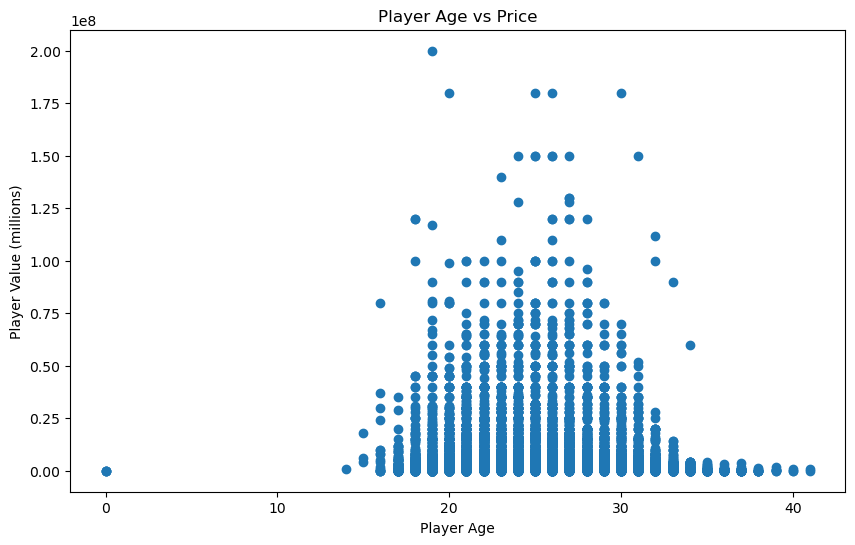

Most Valuable Player Stats ->
Player Name : Kylian Mbappé
player Age : 19.0
Player Value : 200000000.0


In [5]:
# Imports needed for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Graph 1 -> plots the age of the player vs the current price of the player.
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['value'])
plt.xlabel("Player Age")
plt.ylabel("Player Value (millions)")
plt.title("Player Age vs Price")
plt.show()

# Lets find the most valuable player
max_value_index = df['value'].idxmax()
most_valuable_player = df.loc[max_value_index]

# Displaying the most valuable players ststistics 
print("Most Valuable Player Stats ->")
print("Player Name :", most_valuable_player['player'])
print("player Age :", most_valuable_player['age'])
print("Player Value :", most_valuable_player['value'])

**Graph Explanation:**  In our analysis, we plotted the players' age against their current market value and observed that the distribution of market values across different ages is approximately normally distributed. The approximate normal distribution suggests that player market values are symmetrically distributed around a central age. Most players' values cluster around this mean age, with fewer players having very high or very low values as we move further from the mean.The normal distribution indicates that there is a peak age range where players tend to have the highest market value. This is often a critical age range where players are perceived to be at their optimal performance levels, combining physical prime with experience.The fact that the most valuable player is 19 years old highlights the significant market value attributed to young talent. Read more about the importance of youth players in 2 of Helpful Football Footnotes.

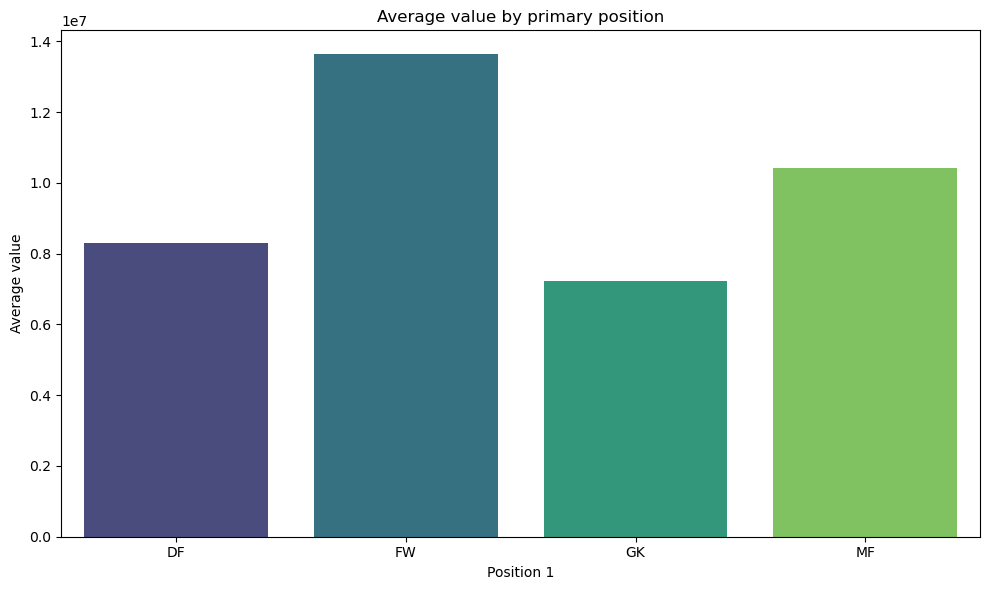

In [6]:
# Find the mean value of every player position
avg_values = df.groupby('Position 1')['value'].mean().reset_index()

# Bar plot of avg value by position
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_values, x='Position 1', y='value', palette='viridis')

# Fixing titles
plt.title('Average value by primary position')
plt.xlabel('Position 1')
plt.ylabel('Average value')

plt.tight_layout()
plt.show()

**Graph Explanation:** The above graph plots the different player positions (forward, defence, goal keeper, mid fielder) vs the mean value of each position. From this we find out that the fowards are paid the most. The fowards are on average paid twice as much as goal keepers. Forwards, being the primary goal-scorers, have a significant impact on the outcome of matches. Their ability to score goals directly influences the team's success, making them highly valuable assets. Although goalkeepers play a critical role in preventing goals, their market values are often lower than those of forwards. This could be due to the specialized nature of their position and lower demand compared to outfield players. Clubs might prioritize investing in high-value forwards to enhance their attacking capabilities. This strategy can lead to better performance in competitions and higher revenues from ticket sales, merchandise, and broadcasting rights.

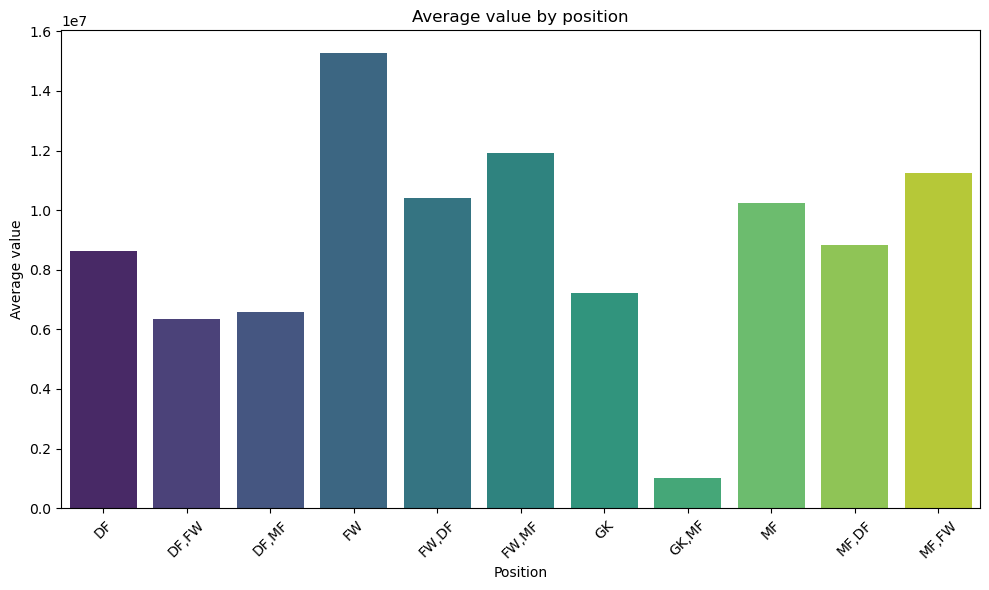

In [7]:
avg_values = df.groupby('position')['value'].mean().reset_index()

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_values, x='position', y='value', palette='viridis')

# Customize the plot
plt.title('Average value by position')
plt.xlabel('Position')
plt.ylabel('Average value')
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels and titles
plt.show()

**Graph Explanation:** So the above plot groups the players by both their primary and secondary positions. We can see that fowards are still the highest paid class of players. The forward + midfielder combination is the second highest paid. The goalkeeper + midfielder combination is by far the lowest paid. We can speculate that clubs are looking for players who are outstanding in just one category and are willing to pay a premium for that. To contextualize the importance of playing multiple positions see 3 in Helpful Football Footnotes.

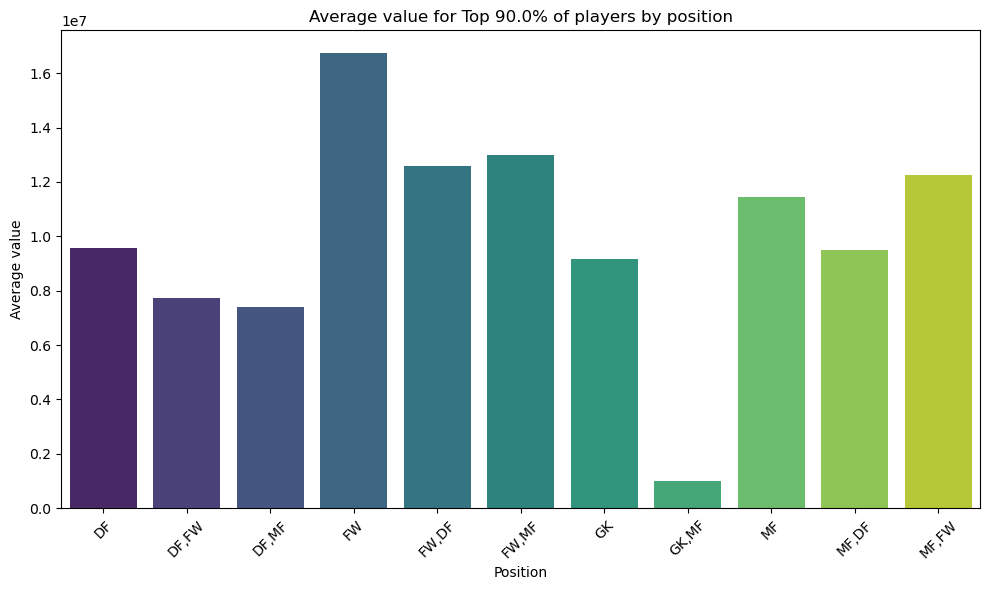

In [8]:
# Finding the lower quartile to exclude
exclude = 0.1
lower = df["value"].quantile(exclude)

df_filtered_values = df[df["value"] > lower]

# Aggregate the data for the filtered DataFrame
avg_values_filtered = df_filtered_values.groupby('position')['value'].mean().reset_index()

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_values_filtered, x='position', y='value', palette='viridis')

# Customize the plot
plt.title(f'Average value for Top {100 - (100 * exclude)}% of players by position')
plt.xlabel('Position')
plt.ylabel('Average value')
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels and titles
plt.show()

**Graph Explanation:** The above graph plots the first and second player positions vs the mean value of that combination. The difference between this and the previous plot is that we have decided to exclude the bottom 0.1% of players based on their value. This is because we have some players who are paid drastically less than others. What we found is that the forwards are still the highest paid category by far. We do end up with slightly more similar results when looking across positions. Even though some players (forwards) are paid a lot more, it does not influence the overall distribution too much.

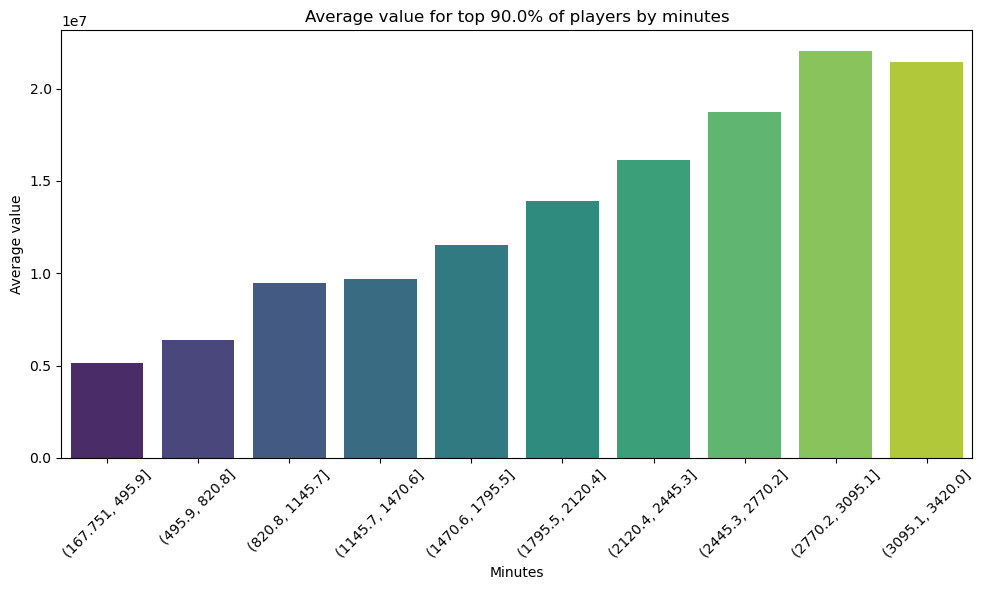

In [9]:
exclude = 0.10
lower = df_filtered_values["minutes"].quantile(exclude)
df_filtered_minutes = df_filtered_values[df_filtered_values["minutes"] > lower].copy()

# Step 2: Aggregate the data for the filtered DataFrame
# For histogram purposes, we can bin the minutes into intervals
df_filtered_minutes.loc[:, 'minutes_bin'] = pd.cut(df_filtered_minutes['minutes'], bins=10)

avg_values_minutes = df_filtered_minutes.groupby('minutes_bin')['value'].mean().reset_index()

# Step 3: Plot using Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_values_minutes, x='minutes_bin', y='value', palette='viridis')

# Step 4: Customize the plot
plt.title(f'Average value for top {100 - (100 * exclude)}% of players by minutes')
plt.xlabel('Minutes')
plt.ylabel('Average value')
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels and titles
plt.show()

**Graph Explanation:** This graph filters out the players who have not played many minutes. Some playes can over perform in various features but have barely played any minutes on field, it is important that we filter out these players sp they do not mess wth out analysis. We can observe that in general the higher the number of minutes played are the higher that category of players are paid. This is because clubs who pay large amounts for players will want to capitalize on their investment and tend to give those playes more time on field.

Let's group players by position before running any analysis on them. Defenders prioritize different skills from attackers, so it makes sense to analyze them separately. For simplicity, we will focus on Forwards, Midfielders and Defenders.

In [10]:
df_fw = df_filtered_minutes[df_filtered_minutes['Position 1'] == 'FW']
df_mf = df_filtered_minutes[df_filtered_minutes['Position 1'] == 'MF']
df_df = df_filtered_minutes[df_filtered_minutes['Position 1'] == 'DF']
df_full = df_filtered_minutes

### **Dimentionality Reduction**

As we noted earlier, our data set has 400 features, these are too many dependent variables for us to make an accurate prediction while still keeping the size of our model relatively small. To simplify this we would like to reduce the dimentionality of the dataset, specifically we will be using Principle Component Analysis to do this.

You can read more about dimentionality reduction and PCA in the resources section

We need to observe the non numeric columns before we proceed with PCA. For PCA in particular categorical variables are not important, so we will begin by excluding all features that are categorical.

We also need to address all the NaN values, which is handled by the SimpleImputer that replaces NaN with the mean of the column. The Scaler is also important for PCA, since we need normalized values in each column to avoid letting large-valued features like "value" (often in the millions) have more influence than small features like "shots on target per minute" which is typically < .01. We will be using pipelines to implify the process, Pipeline is a class in the Sklearn library that is used to streamline and automate the workflow, ensuring that the same series of transformations are consistently applied to the data during both training and prediction phases.

You can read more about Pipline and OneHotEncoder in the resources section.

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# We begin by selecting the numeric and non numeric columns for each of our 3 dataframes (FW, MF, DF) and the full dataframe 
df_fw_numeric = df_fw.select_dtypes(include='number')
df_fw_non_numeric = df_fw.select_dtypes(exclude='number')
df_mf_numeric = df_mf.select_dtypes(include='number')
df_mf_non_numeric = df_mf.select_dtypes(exclude='number')
df_df_numeric = df_df.select_dtypes(include='number')
df_df_non_numeric = df_df.select_dtypes(exclude='number')

df_full_numeric = df_full.select_dtypes(include='number')
df_full_non_numeric = df_full.select_dtypes(exclude='number')
df_full_categorical = df_full_non_numeric[['Position 1', 'foot']]

# Remove value as its our target variable, we do this for each of our data frames 
values_fw = df_fw['value']
df_fw_numeric = df_fw_numeric.drop(columns=['value'])
fw_numeric_cols = df_fw_numeric.columns

values_mf = df_mf['value']
df_mf_numeric = df_mf_numeric.drop(columns=['value'])
mf_numeric_cols = df_mf_numeric.columns

values_df = df_df['value']
df_df_numeric = df_df_numeric.drop(columns=['value'])
df_numeric_cols = df_df_numeric.columns

values_full = df_full['value']
df_full_numeric = df_full_numeric.drop(columns=['value'])
full_numeric_cols = df_full_numeric.columns
full_cat_cols = df_full_categorical.columns

# Numerical Pipeline
# Imputer: Fills missing values with the mean of the column.
# Scaler: Standardizes numeric features.
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

# Categorical Pipeline
# Imputer: Fills missing values with the most frequent value.
# OneHotEncoder: Encodes categorical variables as one-hot (dummy) variables, ignoring unknown categories.
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# applying the piplines to the numeric columns for FW -> output is pandas DF
data_prep_pipe_fw = ColumnTransformer([
    ("num", num_pipe, fw_numeric_cols)
])
data_prep_pipe_fw.set_output(transform="pandas")

# applying the piplines to the numeric columns for MF -> output is pandas DF
data_prep_pipe_mf = ColumnTransformer([
    ("num", num_pipe, mf_numeric_cols)
])
data_prep_pipe_mf.set_output(transform="pandas")

# applying the piplines to the numeric columns for DF -> output is pandas DF
data_prep_pipe_df = ColumnTransformer([
    ("num", num_pipe, df_numeric_cols)
])
data_prep_pipe_df.set_output(transform="pandas")

# applying both the numeric and categrocial pipelines for the full data frame -> output is a pandas DF
data_prep_pipe_full = ColumnTransformer([
    ("num", num_pipe, full_numeric_cols),
    ("cat", cat_pipe, full_cat_cols)
])
data_prep_pipe_full.set_output(transform="pandas")

# Final step is transforming each of the above data frames

X_fw = data_prep_pipe_fw.fit_transform(df_fw_numeric)

X_mf = data_prep_pipe_mf.fit_transform(df_mf_numeric)

X_df = data_prep_pipe_df.fit_transform(df_df_numeric)

X_full = data_prep_pipe_full.fit_transform(df_full)

display(X_full)

/Users/siddhantkumar/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,num__age,num__birth_year,num__height,num__games,num__games_starts,num__minutes,num__goals,num__assists,num__pens_made,num__pens_att,...,num__WinCL,num__CLBestScorer,num__year,cat__Position 1_DF,cat__Position 1_FW,cat__Position 1_GK,cat__Position 1_MF,cat__foot_both,cat__foot_left,cat__foot_right
0,-0.648705,0.215880,0.547519,0.085240,-0.560738,-0.627418,-0.333784,-0.251651,-0.252192,-0.275073,...,-0.103938,-0.024465,-1.287823,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.397441,0.215880,1.270801,0.501087,0.895852,0.819408,-0.601517,-0.251651,-0.252192,-0.275073,...,9.621157,-0.024465,-1.287823,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.151235,0.708844,-0.465076,0.189202,0.604534,0.614168,-0.601517,0.210189,-0.252192,-0.275073,...,-0.103938,-0.024465,-1.287823,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.648705,0.215880,-0.031106,0.293164,0.604534,0.671681,-0.333784,-0.713491,-0.252192,-0.275073,...,-0.103938,-0.024465,-1.287823,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.361413,-1.509493,0.113550,0.812973,0.895852,0.952475,0.201682,-0.713491,-0.252192,1.778467,...,-0.103938,-0.024465,-1.287823,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7102,1.361413,-1.016529,1.126145,1.644667,1.964019,2.059867,-0.601517,-0.713491,-0.252192,-0.275073,...,-0.103938,0.000000,1.155515,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7103,-0.648705,0.708844,-2.490265,-1.370226,-1.434692,-1.470930,-0.333784,-0.713491,-0.252192,-0.275073,...,-0.103938,0.000000,1.155515,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7104,0.858883,-0.523565,0.836832,1.124858,1.284277,1.253569,-0.066051,-0.251651,-0.252192,-0.275073,...,-0.103938,0.000000,1.155515,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7105,-0.648705,0.955326,-0.609732,1.540706,0.895852,1.140800,0.469415,3.443070,-0.252192,-0.275073,...,-0.103938,0.000000,1.155515,0.0,1.0,0.0,0.0,0.0,0.0,1.0


After preparing each of our numeric columns by standardizing them and filling in any missing values with the mean, we are now ready to do our PCA

In [12]:
from sklearn.decomposition import PCA

# value of n_components here is the % retained variance
# This means PCA will select the minimum number of principal components such that 99% of the variance is retained.
pca_fw = PCA(n_components=.99)
pca_mf = PCA(n_components=.99)
pca_df = PCA(n_components=.99)

# Fits the PCA model to the data
pca_fw.fit(X_fw)
pca_mf.fit(X_mf)
pca_df.fit(X_df)

# Transforms the data to the new principal component space.
pca_data_fw = pca_fw.transform(X_fw)
pca_data_mf = pca_mf.transform(X_mf)
pca_data_df = pca_df.transform(X_df)

#number of components returned by PCA with specified retained variance
n_comp_fw = pca_fw.components_.shape[0]
n_comp_mf = pca_mf.components_.shape[0]
n_comp_df = pca_df.components_.shape[0]

#indices of most important features according to PCA
most_important_i_fw = [np.abs(pca_fw.components_[i]).argmax() for i in range(n_comp_fw)]
most_important_i_mf = [np.abs(pca_mf.components_[i]).argmax() for i in range(n_comp_mf)]
most_important_i_df = [np.abs(pca_df.components_[i]).argmax() for i in range(n_comp_df)]

#names from indices
most_important_fw = [fw_numeric_cols[most_important_i_fw[i]] for i in range(n_comp_fw)]
most_important_mf = [fw_numeric_cols[most_important_i_mf[i]] for i in range(n_comp_mf)]
most_important_df = [fw_numeric_cols[most_important_i_df[i]] for i in range(n_comp_df)]

#Map feature names to principal component 
dic_fw = {i+1: most_important_fw[i] for i in range(n_comp_fw)}
dic_mf = {i+1: most_important_mf[i] for i in range(n_comp_mf)}
dic_df = {i+1: most_important_df[i] for i in range(n_comp_df)}

pca_fw = pd.DataFrame(sorted(dic_fw.items()), columns=['PC', 'Feature'])
pca_mf = pd.DataFrame(sorted(dic_mf.items()), columns=['PC', 'Feature'])
pca_df = pd.DataFrame(sorted(dic_df.items()), columns=['PC', 'Feature'])

print("Top 5 features from Forward DF:")
print(pca_fw[0:5], end = "\n\n")
print("Top 5 features from Mid Fielder DF:")
print(pca_mf[0:5], end = "\n\n")
print("Top 5 features from Defender DF:")
print(pca_df[0:5], end = "\n\n")

Top 5 features from Forward DF:
   PC                   Feature
0   1                   touches
1   2  passes_into_final_thirdm
2   3               minutes_gkm
3   4                  xg_per90
4   5                 xGDiff/90

Top 5 features from Mid Fielder DF:
   PC                 Feature
0   1            pass_targets
1   2  goals_against_per90_gk
2   3        touches_att_3rdm
3   4             xg_xa_per90
4   5  passes_total_distancem

Top 5 features from Defender DF:
   PC                   Feature
0   1           passes_pressure
1   2   pct_goal_kicks_launched
2   3     touches_def_pen_aream
3   4  shots_on_target_againstm
4   5                     GDiff



Based on the initial results where we chose to retain 99% variance we are left with 197 features! That's still a lot...but basically half.

Reducing RV to 90% leaves 85 features.

The top 3 features are pass related.

Lets visualize the PCA, we will do so by plotting the player value vs the top features we found from the PCA

In [13]:
import plotly.io as pio
# This ensures Plotly output works in multiple places:
# plotly_mimetype: VS Code notebook UI
# notebook: "Jupyter: Export to HTML" command in VS Code
# See https://plotly.com/python/renderers/#multiple-renderers
pio.renderers.default = "plotly_mimetype+notebook"

fig = px.scatter_3d(df_fw, x="touches", y="xg_per90", z="value", hover_name='player', hover_data=['year', 'squad'])
fig.show()

In [14]:
fig = px.scatter_3d(df_mf, x="pass_targets", y="npxg_xa_per90", z="value", hover_name='player', hover_data=['year', 'squad'])
fig.show()

In [15]:
fig = px.scatter_3d(df_df, x="progressive_passes", y="carry_distancem", z="value", hover_name='player', hover_data=['year', 'squad'])
fig.show()

There is a reason we just didn't select the top 2 features from each list generated by PCA. Some data columns were not fully populated, so a majority of players would have 0's for that stat. This would perform well in PCA, hence it being high on the list. The problem is, there just wasn't enough data in those columns to make meaningfull predictions.

### **Linear Regression**

Lets begin building our machine learning models, we will start with standard linear regression. To begin we will use 5 features to see how accurately we can predict the players price. We shall use two categorical features and the 3 top numeric features from our PCA analysis. The goal of this is to see how much error is being produced by the model, we will then use a variety of different startergies to see how much we can reduce this error.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature list and target variable
features = ['age', 'nationality', 'xG', 'xGA', 'position']  
target = 'value'

# Matrix with feature variables and a series with the target variable
X = df[features]
y = df[target]

categorical_features = ['nationality', 'position']
numeric_features = ['age', 'xG', 'xGA']

# Encoding the categorical variables 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# The linear regression pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Splitting the data into the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fitting the model and predicting the results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [17]:
# Our mean squared error is extremelly high so we shall take the root of it
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 14960768.784369234


Our root mean squared error is extremelly high, this means the standard linear regression model is performing very poorly. The low accuracy in the models predictions means that we need to experiment with other regression models to see if we can reduce the error.

Read more about RMSE in the resources section.

The following 3 models use ridge regularization to see if we can improve the results. We make a separate model for Forwards, Mid Fielders and Defenders and predict values using them. We then print out the R^2 score and the square root of the mean squared error.

In [18]:
results_dict = {}

from sklearn.linear_model import Ridge

# Ridge regularization model for forwards
X_fw_tf = X_fw[['num__touches', 'num__xg_per90', 'num__xa_per90', 'num__assists_per90', 'num__goals_per90']]
y_fw_v = df_fw['value']
X_train_fw, X_test_fw, y_train_fw, y_test_fw = train_test_split(
    X_fw_tf, y_fw_v, test_size=0.33, random_state=42)

clf = Ridge(alpha=1.0)
clf.fit(X_train_fw, y_train_fw)
y_pred_fw = clf.predict(X_test_fw)
print("R^2 score: ", clf.score(X_test_fw, y_test_fw))
print("MSE sqrt: ", np.sqrt(mean_squared_error(y_test_fw, y_pred_fw)))

R^2 score:  0.40908599853318084
MSE sqrt:  18417422.74966746


In [19]:
# Ridge regularization model for midfielders
X_mf_tf = X_mf[['num__pass_targets', 'num__npxg_xa_per90', 'num__xg_xa_per90', 'num__assists_per90', 'num__goals_per90']]
y_mf_v = df_mf['value']
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(
    X_mf_tf, y_mf_v, test_size=0.33, random_state=42)

clf = Ridge(alpha=1.0)
clf.fit(X_train_mf, y_train_mf)
y_pred_mf = clf.predict(X_test_mf)
print("R^2 score: ",clf.score(X_test_mf, y_test_mf))
print("MSE sqrt: ", np.sqrt(mean_squared_error(y_test_mf, y_pred_mf)))

R^2 score:  0.3199375373653738
MSE sqrt:  12371088.336573027


In [20]:
# Ridge regularization model for defenders 
X_df_tf = X_df[['num__progressive_passes', 'num__carry_distancem', 'num__passes_blockedm', 'num__goals_against_per90_gk', 'num__touches_def_pen_aream', 'num__shots_on_target_againstm']]
y_df_v = df_df['value']
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
    X_df_tf, y_df_v, test_size=0.33, random_state=42)

clf = Ridge(alpha=1.0)
clf.fit(X_train_df, y_train_df)
y_pred_df = clf.predict(X_test_df)
print("R^2 score: ", clf.score(X_test_df, y_test_df))
print("MSE sqrt: ", np.sqrt(mean_squared_error(y_test_df, y_pred_df)))

R^2 score:  0.22410248739254923
MSE sqrt:  9871388.864602122


Lets visualize the error in our models when we used PCA

In [21]:
fw_PCA_diff = y_test_fw - y_pred_fw
fig = px.scatter(x=range(len(fw_PCA_diff)), y=fw_PCA_diff, labels={"x": "Players", "y": "Error"})
fig.show()

**Graph Explanation:** The above graph visualizes the error in the ridge regression model for forwards. We can clearly see that the error is quite high, although the values are centered around 0 since the scale of player values is so high even a small difference can result in a high mean squared error. We can also clearly see that some are significantly higher than the other. For example player 420 has an error of 128 million.

In [22]:
mf_PCA_diff = y_test_mf - y_pred_mf
fig = px.scatter(x=range(len(mf_PCA_diff)), y=mf_PCA_diff, labels={"x": "Players", "y": "Error"})
fig.show()

**Graph Explanation:** The above graph visualizes the error in the ridge regression model for midfielders. We can clearly see that the error is quite high, although the values are centered around 0 since the scale of player values is so high even a small difference can result in a high mean squared error. We can also clearly see that some are significantly higher than the other. For example player 111 and 180 have an error of 66 million 

In [23]:
df_PCA_diff = y_test_df - y_pred_df
fig = px.scatter(x=range(len(df_PCA_diff)), y=df_PCA_diff, labels={"x": "Players", "y": "Error"})
fig.show()

**Graph Explanation:** The above graph visualizes the error in the ridge regression model for defenders. We can clearly see that the error is quite high, although the values are centered around 0 since the scale of player values is so high even a small difference can result in a high mean squared error. We can also clearly see that some are significantly higher than the other. For example player 537 has an error of 67 million.

### **Selecting Features using Ridge Regression**

The next section is going to focus on how we can pick the optimal set of features to predict values in our dataset. We are going to use a technique called foward selection which is a feature selection technique. We build a model by incrementally adding features that contribute the most to improving model performance. It starts with an empty set of features and adds one feature at a time based on certain criteria until no further improvement is observed. It can be computationally less expensive compared to other feature selection techniques, especially when dealing with a large number of features.

Read more about ridge regression and feature selection in the resources section.

In [24]:
# All the features we are testing
remaining_features = ['num__' + f for f in most_important_fw]

# Final feature list
features = []
final_score = None

# Will loop until we add all features or will stop if we are not seeing major improvement
while (remaining_features):

    # best score we can produce
  best_score = (final_score, None)

    # Add a new feature and perform ridge regression
  for f in remaining_features:
    # List of features 
    temp = features + [f]
    # Get the respective features
    X_fw_tf = X_fw[temp]
    # Get the actual values 
    y_fw_v = df_fw['value']
    # Split the data set into training and testing 
    X_train_fw, X_test_fw, y_train_fw, y_test_fw = train_test_split(
        X_fw_tf, y_fw_v, test_size=0.33, random_state=42)
    # Perform Ridge regression
    clf = Ridge(alpha=1.0)
    clf.fit(X_train_fw, y_train_fw)
    score = clf.score(X_test_fw, y_test_fw)
    # Compare the new score to the previous score 
    if not best_score[0] or score > best_score[0]:
      best_score = (score, f)
  if not best_score[1]:
    break
  else:
    features = features + [best_score[1]]
    remaining_features.remove(best_score[1])
    if final_score and best_score[0] - final_score < .01: #so that once we're seeing minimal improvement it breaks
      break
    final_score = best_score[0]


# For future visualization
X_fw_tf = X_fw[features]
y_fw_v = df_fw['value']
X_train_fw, X_test_fw, y_train_fw, y_test_fw = train_test_split(
    X_fw_tf, y_fw_v, test_size=0.33, random_state=42)

clf = Ridge(alpha=1.0)
clf.fit(X_train_fw, y_train_fw)
y_pred_fw = clf.predict(X_test_fw)

print("Forward selection on FW class : ")
print("Best R^2 score: ", final_score)
print("List of Features we used: ", features)
print("Number of features used: ", len(features))

Forward selection on FW class : 
Best R^2 score:  0.5922064025240625
List of Features we used:  ['num__gca_passes_live', 'num__xGDiff/90', 'num__sca_dribbles', 'num__CL', 'num__age', 'num__xg_per90', 'num__offsides']
Number of features used:  7


The above code block uses forward selection to pick the best set of features. We incrementaly add a new feature and perform ridge regression. We then return the best R^2 score from all the combinations. From the above we can see that the top 7 features produce a R^2 score of 0.5922. For the above code block we use the top features we found from PCA. In the next code block we will use the entire feature list to see how the performance changes.

In [25]:
# Entire feature list
fw_num_features = X_fw.columns

# List we use to add features 
remaining_features = [f for f in fw_num_features]

# Final feature list
features = []
final_score = None


# Incrementaly add feature and perfrom Ridge Regression
while (remaining_features):

  best_score = (final_score, None)

  for f in remaining_features:
    temp = features + [f]
    X_fw_tf = X_fw[temp]
    y_fw_v = df_fw['value']
    X_train_fw, X_test_fw, y_train_fw, y_test_fw = train_test_split(
        X_fw_tf, y_fw_v, test_size=0.33, random_state=42)

    clf = Ridge(alpha=1.0)
    clf.fit(X_train_fw, y_train_fw)
    score = clf.score(X_test_fw, y_test_fw)
    if not best_score[0] or score > best_score[0]:
      best_score = (score, f)
  if not best_score[1]:
    break
  else:
    features = features + [best_score[1]]
    remaining_features.remove(best_score[1])
    if final_score and best_score[0] - final_score < .01: #so that once we're seeing minimal improvement it breaks
      break
    final_score = best_score[0]

# For future visualization
X_fw_tf = X_fw[features]
y_fw_v = df_fw['value']
X_train_fw, X_test_fw, y_train_fw, y_test_fw = train_test_split(
    X_fw_tf, y_fw_v, test_size=0.33, random_state=42)

clf = Ridge(alpha=1.0)
clf.fit(X_train_fw, y_train_fw)
y_pred_fw = clf.predict(X_test_fw)

print("Forward selection on FW class : ")
print("Best R^2 score: ", final_score)
print("List of Features we used: ", features)
print("Number of features used: ", len(features))

Forward selection on FW class : 
Best R^2 score:  0.6700172714244282
List of Features we used:  ['num__gca', 'num__xGDiff/90', 'num__npxg', 'num__age', 'num__fouls', 'num__CL', 'num__passes_completed_short', 'num__pressures', 'num__touches_att_pen_area']
Number of features used:  9


In the above code block we will break the while loop and stop adding features if we are not seeing an improvement in the models performance (R^2 score). This is a good idea as otherwise we will have to perfrom ridge regression 400 times in order to analyse the entire dataset. So from the above code block we can see that performing forward selection on the entire data set we get an R^2 score of 0.67001 which was calculated using 9 features.

Lets perform the same concept of forward selection on the defender and midfidelder data frames that we had previously made.

In [26]:
# Forward selection on the defencer data frame 

df_num_features = X_df.columns

remaining_features = [f for f in df_num_features]
features = []
final_score = None

while (remaining_features):

  best_score = (final_score, None)

  for f in remaining_features:
    temp = features + [f]
    X_df_tf = X_df[temp]
    y_df_v = df_df['value']
    X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
        X_df_tf, y_df_v, test_size=0.33, random_state=42)

    clf = Ridge(alpha=1.0)
    clf.fit(X_train_df, y_train_df)
    score = clf.score(X_test_df, y_test_df)
    if not best_score[0] or score > best_score[0]:
      best_score = (score, f)
  if not best_score[1]:
    break
  else:
    features = features + [best_score[1]]
    remaining_features.remove(best_score[1])
    if final_score and best_score[0] - final_score < .01: #so that once we're seeing minimal improvement it breaks
      break
    final_score = best_score[0]
X_df_tf = X_df[features]
y_df_v = df_df['value']
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
    X_df_tf, y_df_v, test_size=0.33, random_state=42)

clf = Ridge(alpha=1.0)
clf.fit(X_train_df, y_train_df)
y_pred_df = clf.predict(X_test_df)

print("Forward selection on DF class : ")
print("Best R^2 score: ", final_score)
print("List of Features we used: ", features)
print("Number of features used: ", len(features))

Forward selection on DF class : 
Best R^2 score:  0.5686561836223272
List of Features we used:  ['num__passes_ground', 'num__W', 'num__birth_year', 'num__WinCL', 'num__through_balls']
Number of features used:  5


In [27]:
# Forward selection on the midfielder dataframe 

mf_num_features = X_mf.columns

remaining_features = [f for f in mf_num_features]
features = []
final_score = None

while (remaining_features):

  best_score = (final_score, None)

  for f in remaining_features:
    temp = features + [f]
    X_mf_tf = X_mf[temp]
    y_mf_v = df_mf['value']
    X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(
        X_mf_tf, y_mf_v, test_size=0.33, random_state=42)

    clf = Ridge(alpha=1.0)
    clf.fit(X_train_mf, y_train_mf)
    score = clf.score(X_test_mf, y_test_mf)
    if not best_score[0] or score > best_score[0]:
      best_score = (score, f)
  if not best_score[1]:
    break
  else:
    features = features + [best_score[1]]
    remaining_features.remove(best_score[1])
    if final_score and best_score[0] - final_score < .01: #so that once we're seeing minimal improvement it breaks
      break
    final_score = best_score[0]
X_mf_tf = X_mf[features]
y_mf_v = df_mf['value']
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(
    X_mf_tf, y_mf_v, test_size=0.33, random_state=42)

clf = Ridge(alpha=1.0)
clf.fit(X_train_mf, y_train_mf)
y_pred_mf = clf.predict(X_test_mf)

print("Forward selection on MF class : ")
print("Best R^2 score: ", final_score)
print("List of Features we used: ", features)
print("Number of features used: ", len(features))

Forward selection on MF class : 
Best R^2 score:  0.5581206662872016
List of Features we used:  ['num__gca_passes_live', 'num__W', 'num__birth_year', 'num__goals', 'num__passes_into_final_third', 'num__passes_oob', 'num__CL']
Number of features used:  7


Lets visualize the differnce in error between our previous PCA model and the new Ridge model we made using feature selection 

In [28]:
diff = y_test_fw - y_pred_fw
d = {'PCA Error': fw_PCA_diff, 'Feature Selection Error': diff}
temp_df = pd.DataFrame(d)
fig = px.scatter(temp_df, x=range(len(diff)), y=['PCA Error', 'Feature Selection Error'], labels={"x": "Players", "y": "Error"},
                 title="Error of PCA-selected features vs forward selected features of Forwards")
fig.show()

In [29]:
diff = y_test_mf - y_pred_mf
d = {'PCA Error': mf_PCA_diff, 'Feature Selection Error': diff}
temp_df = pd.DataFrame(d)
fig = px.scatter(temp_df, x=range(len(diff)), y=['PCA Error', 'Feature Selection Error'], labels={"x": "Players", "y": "Error"},
                 title="Error of PCA-selected features vs forward selected features of Midfielders", render_mode="svg")
fig.show()

In [30]:
diff = y_test_df - y_pred_df
d = {'PCA Error': df_PCA_diff, 'Feature Selection Error': diff}
temp_df = pd.DataFrame(d)
fig = px.scatter(temp_df, x=range(len(diff)), y=['PCA Error', 'Feature Selection Error'], labels={"x": "Players", "y": "Error"},
                 title="Error of PCA-selected features vs forward selected features of Defenders", render_mode="svg")
fig.show()

**Graph Explanations:** The above 3 graphs show how our models are improving. The red dots in the above graphs indicate the error in our new model (using forward selection to find the ideal feature list), the blue dots show the error from our previous PCA model. For all 3 graphs we can see that the red dots are now more clustered around 0, this means the error in the model has reduced when compared to the PCA model. We can also choose specific outlying points from the PCA model and when we compare it to the new model we can see how the error has reduced.

As an experiment lets try the forward selection process on the entire data set to see what the R^2 score is.

In [31]:
full_features = X_full.columns
remaining_features = [f for f in full_features]
features = []
final_score = None

while (remaining_features):

  best_score = (final_score, None)

  for f in remaining_features:
    temp = features + [f]
    X_tf = X_full[temp]
    y_v = values_full
    X_train, X_test, y_train, y_test = train_test_split(
        X_tf, y_v, test_size=0.33, random_state=42)

    clf = Ridge(alpha=1.0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if not best_score[0] or score > best_score[0]:
      best_score = (score, f)
  if not best_score[1]:
    break
  else:
    features = features + [best_score[1]]
    remaining_features.remove(best_score[1])
    if final_score and best_score[0] - final_score < .01: #so that once we're seeing minimal improvement it breaks
      break
    final_score = best_score[0]
X_tf = X_full[features]
y_v = values_full
X_train, X_test, y_train, y_test = train_test_split(
    X_tf, y_v, test_size=0.33, random_state=42)

clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

results_dict['ridge_select_features'] = (y_test, y_pred)

ridge_error = y_test - y_pred

print("Forward selection on Entire Data set : ")
print("Best R^2 score: ", final_score)
print("List of Features we used: ", features)
print("Number of features used: ", len(features))

Forward selection on Entire Data set : 
Best R^2 score:  0.5452290852554981
List of Features we used:  ['num__W', 'num__touches_att_pen_area', 'num__birth_year', 'num__passes_completed_long', 'num__CL', 'num__npxg_net', 'num__through_balls']
Number of features used:  7


When we apply forward selction on the entire datset we get an R^2 score of 0.54, which is not bad considering the size of the dataset. We get this score by using 7 feature values.

### **Random Forest Regression**

Now that we have covered linear regression and its different types, let us look at a different type of regression known as random forest. The way random forest works is that it combines the predictions of multiple decision trees to reduce error and overfitting. This technique in machine learning is called Ensemble learning. Random forest can be used for both classifictaion and regression. The idea behind it is that each induvidual decision tree has a high variance but when we combine all of them in parallel the varience is reduced. We are going to be using the random forest regressor from sklearn to predict our values.

Read more about random forest in the resources section

Lets begin by looking just at the forward's dataset, lets find which parameters perform best with the RandomForestRegressor. I'm examining both the R^2 value and RMSE, since RMSE is a little more informative about how our regressor is performing.

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


rf_param_grid = {
    'n_estimators': [50], # num decision trees
    'max_depth': [10], # max depth of each tree
    'max_features': [.5], # % of features used in each tree
}
rf = RandomForestRegressor()
search = RandomizedSearchCV(estimator = rf, param_distributions = rf_param_grid, n_iter = 1, #originally 80
                            cv = 5, verbose=10, random_state=42,
                            scoring=['neg_root_mean_squared_error', 'r2'],
                            refit='neg_root_mean_squared_error',
                            n_jobs=-1)

search.fit(X_full[features], values_full)
print("Scoring hyper parameters", search.best_params_, search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=10, max_features=0.5, n_estimators=50.............
[CV 2/5; 1/1] START max_depth=10, max_features=0.5, n_estimators=50.............
[CV 4/5; 1/1] START max_depth=10, max_features=0.5, n_estimators=50.............
[CV 3/5; 1/1] START max_depth=10, max_features=0.5, n_estimators=50.............
[CV 5/5; 1/1] START max_depth=10, max_features=0.5, n_estimators=50.............
[CV 1/5; 1/1] END max_depth=10, max_features=0.5, n_estimators=50; neg_root_mean_squared_error: (test=-11162025.460) r2: (test=0.643) total time=   0.2s
[CV 2/5; 1/1] END max_depth=10, max_features=0.5, n_estimators=50; neg_root_mean_squared_error: (test=-10085074.092) r2: (test=0.696) total time=   0.2s
[CV 4/5; 1/1] END max_depth=10, max_features=0.5, n_estimators=50; neg_root_mean_squared_error: (test=-9859963.423) r2: (test=0.534) total time=   0.2s
[CV 3/5; 1/1] END max_depth=10, max_features=0.5, n_estimators=50; neg_root_me

Once we find the ideal parameters from the above code block we can use that to train a new Random Forest Regressor to predict values.

In [33]:
rf_params = search.best_params_
rf = RandomForestRegressor(**rf_params)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
        X_full[features], values_full, test_size=0.33, random_state=42)

# Fitting the model
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
results_dict['rf_select_features'] = (y_test, y_pred)

print("Best R^2 score: ",rf.score(X_test, y_test)) 
print("Sq Root of Mean Sq Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Best R^2 score:  0.6662042699891689
Sq Root of Mean Sq Error:  9985567.040604899


From the above code block we can see that once we find the ideal parameters and fit the model, we get an R^2 score of 0.65. An R^2 score of 0.65 means that approximately 65% of the variance in the dependent variable (target) can be explained by the independent variables (features) in the model. RF regression got an R^2 score of .66 compared to .54 with Ridge.

Lets plot the error so it is easier to visualize.

In [34]:
# Plotting the error in Random forest data and ridge regression data

rf_error = y_test - y_pred
d = {'Ridge Error': ridge_error, 'Random Forest Error': rf_error}
temp_df = pd.DataFrame(d)
fig = px.scatter(temp_df, x=range(len(rf_error)), y=['Ridge Error', 'Random Forest Error'], labels={"x": "Players"},
                 title="Error of Ridge Regression vs Random Forest on Full Dataset", render_mode="svg")
fig.update_yaxes(
        title_text = "Error")
fig.show()

**Graph Explanation:** The above graph plots the error in our new Random Forest Regression model and our previous Ridge Regression model. The data is from the entire data set and not the induvidual player classes. The error is much tighter with Random Forest, but some outliers still cause issues and likely drive the overall RMSE value way up.

To improve on the models performance let us train a Random Forest model on the entire dataset and see how it improves the R^2 score.

In [35]:
rf_2_param_grid = {
    'n_estimators': [50], # num decision trees
    'max_depth': [10], # max depth of each tree
    'max_features': [.5], # % of features used in each tree
}
rf_2 = RandomForestRegressor()
search = RandomizedSearchCV(estimator = rf_2, param_distributions = rf_2_param_grid, n_iter = 1, #originally 80
                            cv = 5, verbose=10, random_state=42,
                            scoring=['neg_root_mean_squared_error', 'r2'],
                            refit='neg_root_mean_squared_error',
                            n_jobs=-1)
search.fit(X_full, values_full)
print("Scoring hyper parameters", search.best_params_, search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5; 1/1] START max_depth=10, max_features=0.5, n_estimators=50.............
[CV 4/5; 1/1] START max_depth=10, max_features=0.5, n_estimators=50.............
[CV 5/5; 1/1] START max_depth=10, max_features=0.5, n_estimators=50.............
[CV 1/5; 1/1] START max_depth=10, max_features=0.5, n_estimators=50.............
[CV 3/5; 1/1] START max_depth=10, max_features=0.5, n_estimators=50.............
[CV 4/5; 1/1] END max_depth=10, max_features=0.5, n_estimators=50; neg_root_mean_squared_error: (test=-9842725.126) r2: (test=0.536) total time=  11.3s
[CV 5/5; 1/1] END max_depth=10, max_features=0.5, n_estimators=50; neg_root_mean_squared_error: (test=-10451179.197) r2: (test=0.607) total time=  11.3s
[CV 2/5; 1/1] END max_depth=10, max_features=0.5, n_estimators=50; neg_root_mean_squared_error: (test=-9850891.586) r2: (test=0.710) total time=  11.4s
[CV 3/5; 1/1] END max_depth=10, max_features=0.5, n_estimators=50; neg_root_mea

Now that we have found the ideal parameters for the Random Forest Regrssion let us fit a new model and predict the values.

In [36]:
rf_2_params = search.best_params_
rf_2 = RandomForestRegressor(**rf_2_params)

X_train, X_test, y_train, y_test = train_test_split(
        X_full, values_full, test_size=0.33, random_state=42)

rf_2.fit(X_train, y_train)
y_pred = rf_2.predict(X_test)
results_dict['rf_full_features'] = (y_test, y_pred)

print("Best R^2 score: ",rf_2.score(X_test, y_test)) 
print("Sq Root of Mean Sq Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Best R^2 score:  0.6503481506812439
Sq Root of Mean Sq Error:  10219984.994770864


### **Overall Analysis**

To find out which model worked the best let us compare the performance of all the regression models we encountered in this project.

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

models = list(results_dict.keys())
rmse = []
r2 = []
mape = []
for m in models:
  y_true, y_pred = results_dict[m][0], results_dict[m][1]
  rmse.append(np.sqrt(mean_squared_error(y_true, y_pred)))
  r2.append(r2_score(y_true, y_pred))
  mape.append(mean_absolute_percentage_error(y_true, y_pred))

rmse_df = pd.DataFrame({'model': models, 'RMSE': rmse, 'r2': r2, 'MAPE': mape})

rmse_fig = px.bar(rmse_df, 'model', 'RMSE', color='model', title='Comparing RMSE of various regression models')

r2_fig = px.bar(rmse_df, 'model', 'r2', color='model', title='Comparing R^2 of various regression models')

mape_fig = px.bar(rmse_df, 'model', 'MAPE', color='model', title='Comparing MAPE of various regression models')


rmse_fig.show()
r2_fig.show()
mape_fig.show()

From the above plots we can see that the Random Forest Regression model that had a select amount of features perfomed the best from our models, this is the model we would choose if we were going to predict a footballers price. Although it is important to note that the mean squared error is still high, but relative to the extremelly high price that football players are trading at it is not bad.

### **Conclusion**

In conclusion, this project utilized various machine learning techniques to predict the prices of soccer players. We employed principal component analysis (PCA), regular linear regression, ridge regression, and random forest regression to model the relationship between player attributes and market value.

Through rigorous experimentation and evaluation, we found that the random forest regression model, coupled with a selection of key features, yielded the most accurate predictions. This suggests that the ensemble nature of random forests, combined with feature selection, provides robust performance in capturing the complex relationships inherent in soccer player valuation.

Additionally, our exploration of different techniques, including PCA for dimensionality reduction and regularization methods like ridge regression, provided valuable insights into the predictive power of each approach. While linear regression and ridge regression offered reasonable performance, the random forest model outperformed them, demonstrating its efficacy in handling nonlinear relationships and interactions among features.

In essence, our findings underscore the importance of employing a diverse set of machine learning techniques and conducting thorough experimentation to identify the most suitable model for a given task. Moving forward, the insights gained from this project can inform decision-making processes in soccer player valuation, aiding clubs, agents, and analysts in making more informed decisions regarding player acquisitions and transfers.

### **Bibliography & Resources**

**Football Related Resources:**

Project Dataset: https://www.kaggle.com/datasets/kriegsmaschine/soccer-players-values-and-their-statistics

Football sites to help understand dataset: 
1. https://www.transfermarkt.de/
2. https://fbref.com/

Football transfer resources: https://www.footballtransfers.com/en/values/players

Research thesis on factors that influence football players values: https://www.researchgate.net/publication/351335017_Factors_affecting_the_value_of_football_players_in_the_transfer_market


Helpful Football Footnotes: 

1. Football Positions Explained: https://jobsinfootball.com/blog/soccer-positions/
2. Importance of Youth Players: https://statathlon.com/youth-players-and-their-importance-to-football-clubs-the-example-of-dinamo-zagreb/
3. Importance of Playing Multiple Positions: https://expandyourgame.com/utility-player-in-soccer/


                 


**Data Science Related Resources:**

Dimentionality Reduction: https://www.javatpoint.com/dimensionality-reduction-technique

SVD: https://math.mit.edu/classes/18.095/2016IAP/lec2/SVD_Notes.pdf

PCA: 
1. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. https://www.geeksforgeeks.org/principal-component-analysis-pca/

RMSE: https://statisticsbyjim.com/regression/root-mean-square-error-rmse/

R^2: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html

Pipeline & Column Transformer: https://www.freecodecamp.org/news/machine-learning-pipeline/

OneHotEncoding: https://www.geeksforgeeks.org/ml-one-hot-encoding/

Ridge Regression:
1. https://online.stat.psu.edu/stat857/node/155/
2. https://www.tutorialspoint.com/scikit_learn/scikit_learn_ridge_regression.htm

Feature selection: https://www.geeksforgeeks.org/feature-selection-techniques-in-machine-learning/

Forward selection: https://www.statology.org/forward-selection/

Random Forest:
1. https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,Decision%20trees
2. https://towardsdatascience.com/random-forest-regression-5f605132d19d